Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.



In [3]:
!pip install yfinance



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 115.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 124.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 101.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 111.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 27.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-py3-none-any.whl size=138635 sha256=3a5251f8c9df7b935b505735eb42ea9f80819ded13594f282f5cf5d60913abce
  Stored in directory: /home/jupyterlab/.cache/pip/

In [4]:
import yfinance as yf

tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-12-31')

tesla_data.reset_index(inplace=True)

tesla_data_head = tesla_data.head()
print(tesla_data_head)


[*********************100%%**********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close     Volume
0 2020-01-02  28.299999  28.713333  28.114000  28.684000  28.684000  142981500
1 2020-01-03  29.366667  30.266666  29.128000  29.534000  29.534000  266677500
2 2020-01-06  29.364668  30.104000  29.333332  30.102667  30.102667  151995000
3 2020-01-07  30.760000  31.441999  30.224001  31.270666  31.270666  268231500
4 2020-01-08  31.580000  33.232666  31.215334  32.809334  32.809334  467164500


Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tesla_revenue_table = None
for table in soup.find_all('table'):
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue_table = table
        break

if tesla_revenue_table:
    tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
    tesla_revenue.dropna(inplace=True)
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

    tesla_revenue_tail = tesla_revenue.tail()
    print(tesla_revenue_tail)
else:
    print("Table not found.")


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


/tmp/ipykernel_116/16372368.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [10]:
import yfinance as yf

gme_data = yf.download('GME', start='2020-01-01', end='2023-12-31')

# Reset the index
gme_data.reset_index(inplace=True)

gme_data_head = gme_data.head()
print(gme_data_head)


[*********************100%%**********************]  1 of 1 completed

        Date    Open    High     Low   Close  Adj Close    Volume
0 2020-01-02  1.5350  1.6175  1.5175  1.5775     1.5775  17814400
1 2020-01-03  1.5525  1.5625  1.4600  1.4700     1.4700  14175600
2 2020-01-06  1.4500  1.4775  1.4000  1.4625     1.4625  13579200
3 2020-01-07  1.4425  1.4575  1.3600  1.3800     1.3800  20912000
4 2020-01-08  1.3725  1.4625  1.3525  1.4300     1.4300  22517600


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.



In [13]:

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"


response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


tables = soup.find_all('table')
gme_revenue_table = tables[1] 


gme_revenue = pd.read_html(str(gme_revenue_table))[0]


gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]


gme_revenue_tail = gme_revenue.tail()
print(gme_revenue_tail)


          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


/tmp/ipykernel_116/560739141.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(gme_revenue_table))[0]


Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

In [16]:
!pip install matplotlib



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 132.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 116.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 117.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 12.2 MB/s eta 0:00:00


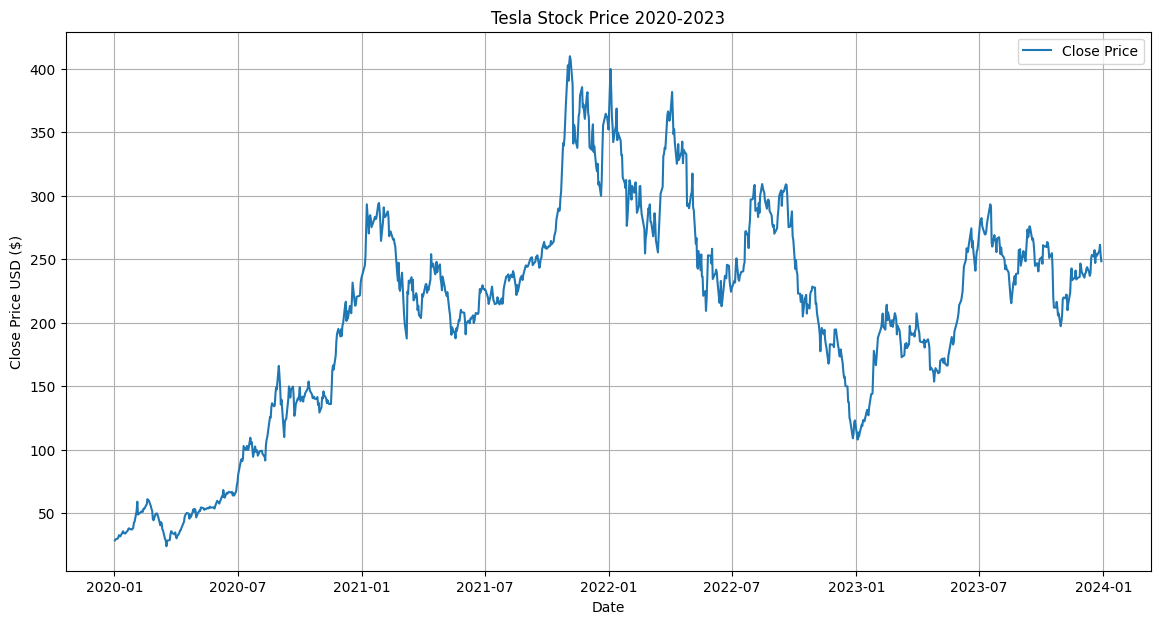

In [17]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


make_graph(tesla_data, "Tesla Stock Price 2020-2023")

